**NAME: -VEMULA KASINATH**

Adaboost and Random Forest on Movie Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

In [2]:
data=pd.read_csv("/content/movie_success_rate.csv")
data=data.dropna(axis=0, how='any')

Data for Evaluation¶

In [3]:
#Data for Evaluation
X = data[data.columns[6:32]]
Y=data.iloc[:,-1]

Splitting Train and Test Data

In [4]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training - Adaboost

In [5]:
#Model and Training - Adaboost
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))
adaboost_model.fit(X_train, Y_train)
y_pred = adaboost_model.predict(X_test)

Model Training - Random Forest

In [6]:
#Model and Training - Random Forest
randomforest_model = RandomForestClassifier(n_estimators=60)
randomforest_model.fit(X_train, Y_train)
y_pred_rf = randomforest_model.predict(X_test)

Model EvaluatioN

In [7]:
conf_mat_adaboost = confusion_matrix(Y_test,y_pred)
acc_adaboost = accuracy_score(Y_test, y_pred)
precision_adaboost = precision_score(Y_test,y_pred)
recall_adaboost = recall_score(Y_test,y_pred)
false_positive_rate_adaboost, true_positive_rate_adaboost, thresholds_adaboost = roc_curve(Y_test, y_pred)
roc_auc_adaboost = auc(false_positive_rate_adaboost, true_positive_rate_adaboost)

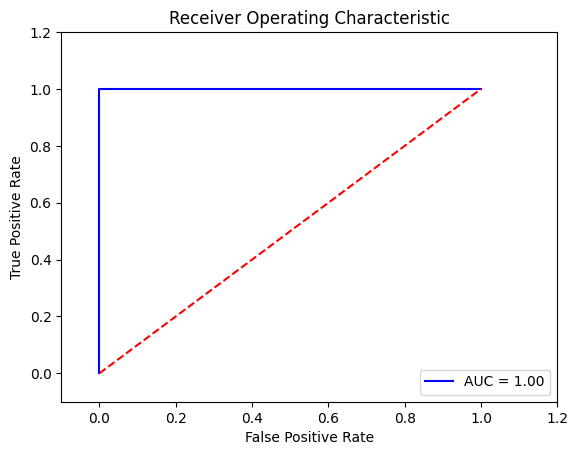

In [8]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_adaboost, true_positive_rate_adaboost, 'b',
label='AUC = %0.2f'% roc_auc_adaboost)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model Evaluation for Random Forest

In [9]:
#Model Evaluation for Random Forest
conf_mat_rf = confusion_matrix(Y_test,y_pred_rf)
acc_rf = accuracy_score(Y_test, y_pred_rf)
precision_rf = precision_score(Y_test,y_pred_rf)
recall_rf = recall_score(Y_test,y_pred_rf)
false_positive_rate_rf, true_positive_rate_rf, thresholds_rf = roc_curve(Y_test, y_pred_rf)
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)

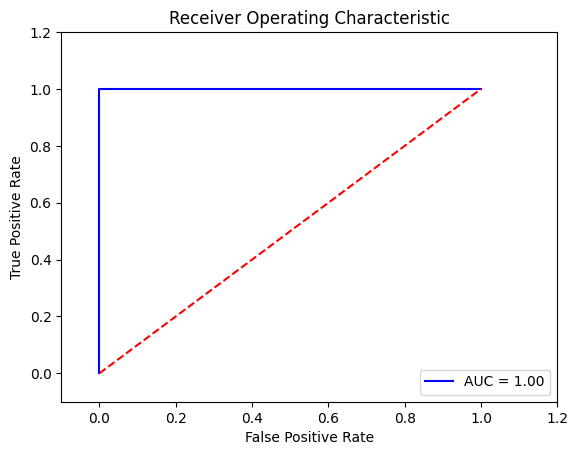

In [10]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_rf, true_positive_rate_rf, 'b',
label='AUC = %0.2f'% roc_auc_rf)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:
#Print Results
print('Confusion Matrix for Adaboost is :')
print(conf_mat_adaboost)
print('\nAccuracy for Adaboost is :')
print(acc_adaboost)
print('\nPrecision is :')
print(precision_adaboost)
print('\nRecall is: ')
print(recall_adaboost)

Confusion Matrix for Adaboost is :
[[173   0]
 [  0  37]]

Accuracy for Adaboost is :
1.0

Precision is :
1.0

Recall is: 
1.0


In [12]:
#Print Results
print('Confusion Matrix for Random Forest is :')
print(conf_mat_rf)
print('\nAccuracy for Random Forest is :')
print(acc_rf)
print('\nPrecision is :')
print(precision_rf)
print('\nRecall is: ')
print(recall_rf)

Confusion Matrix for Random Forest is :
[[173   0]
 [  0  37]]

Accuracy for Random Forest is :
1.0

Precision is :
1.0

Recall is: 
1.0
